R² Score: 0.857169581776308
RMSE: 78655.57808711893
Predicted Student Enrollment:
   year  predicted_students
2022/23             1110844
2023/24             1138680
2024/25             1166516
2025/26             1194352
2026/27             1222189
2027/28             1250025
2028/29             1277861
2029/30             1305697
2030/31             1333533
2031/32             1361369

Predictions saved to 'enrollment_predictions_2022_2032.csv'


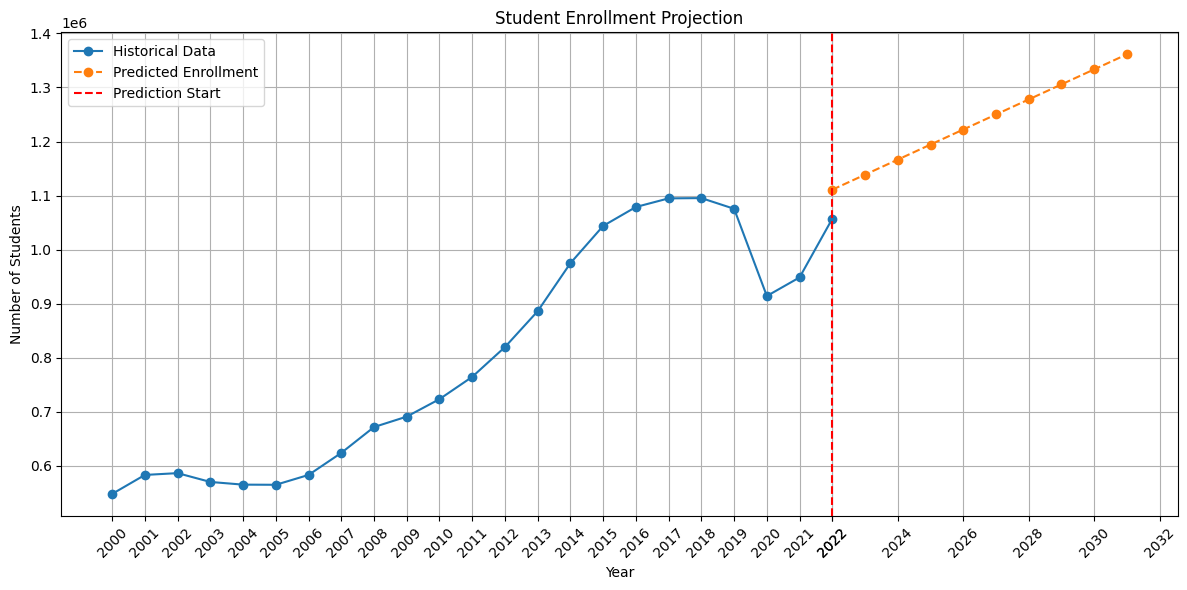

Combined historical and predicted data saved to 'enrollment_data_2000_2032.csv'


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("source_of_fund.csv")

yearly_totals = data.groupby('year')['students'].sum().reset_index()

# Extract the first year part and convert to numeric for regression
yearly_totals['year_numeric'] = yearly_totals['year'].apply(lambda x: int(x.split('/')[0]))

# Train a linear regression model on the historical data
X = yearly_totals[['year_numeric']]
y = yearly_totals['students']
model = LinearRegression()
model.fit(X, y)

#accuracy

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("R² Score:", r2)
print("RMSE:", rmse)


# Create future years for prediction (2022-2032)
future_years = list(range(2022, 2032))
future_years_df = pd.DataFrame({'year_numeric': future_years})
predicted_enrollments = model.predict(future_years_df)

# Create a DataFrame with future predictions
future_predictions = pd.DataFrame({
    'year': [f"{year}/{str(year+1)[-2:]}" for year in future_years],
    'year_numeric': future_years,
    'predicted_students': [int(max(0, pred)) for pred in predicted_enrollments]  # Ensure no negative predictions
})

# Save predictions to CSV file
future_predictions[['year', 'predicted_students']].to_csv('enrollment_predictions_2022_2032.csv', index=False)

# Visualize the results - start from year 2000
plt.figure(figsize=(12, 6))

# Filter data to start from 2000
filtered_totals = yearly_totals[yearly_totals['year_numeric'] >= 2000]

plt.plot(filtered_totals['year_numeric'], filtered_totals['students'], 'o-', label='Historical Data')
plt.plot(future_predictions['year_numeric'], future_predictions['predicted_students'], 'o--', label='Predicted Enrollment')
plt.axvline(x=filtered_totals['year_numeric'].max(), color='r', linestyle='--', label='Prediction Start')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Student Enrollment Projection')
plt.grid(True)
plt.legend()

# Create x-ticks that include years from 2000 to 2032 with appropriate spacing
x_ticks = sorted(list(filtered_totals['year_numeric']) + list(range(2022, 2033, 2)))
plt.xticks(x_ticks, rotation=45)
plt.tight_layout()

# Display results
print("Predicted Student Enrollment:")
prediction_table = future_predictions[['year', 'predicted_students']]
print(prediction_table.to_string(index=False))
print(f"\nPredictions saved to 'enrollment_predictions_2022_2032.csv'")

# Save the plot
plt.savefig('enrollment_projection_2000_2032.png', dpi=300)
plt.show()

# Create a combined CSV with both historical and predicted data for reference
historical_data_for_csv = filtered_totals[['year', 'students']].rename(columns={'students': 'actual_students'})
predicted_data_for_csv = future_predictions[['year', 'predicted_students']]

# Create an empty DataFrame with all years from 2000 to 2032
all_years = [f"{year}/{str(year+1)[-2:]}" for year in range(2000, 2032)]
combined_data = pd.DataFrame({'year': all_years})

# Merge historical and predicted data
combined_data = combined_data.merge(historical_data_for_csv, on='year', how='left')
combined_data = combined_data.merge(predicted_data_for_csv, on='year', how='left')

# Save the combined data
combined_data.to_csv('enrollment_data_2000_2032.csv', index=False)
print(f"Combined historical and predicted data saved to 'enrollment_data_2000_2032.csv'")